### Dataset Download

Dataset can be downloaded from yt-hub https://girder.hub.yt/#folder/5e6d2a7168085e00018c9088, and there should be 1594 files in total

### Environment Setup

We will use the ASE package to digest the `.traj` files and here is the installation instruction https://wiki.fysik.dtu.dk/ase/install.html

In [1]:
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

### File Information

In [2]:
def gather_folder_info(root_folder):
    # Create an empty dictionary to store information
    folder_info = {}
    
    # Check if the provided root folder exists
    if not os.path.exists(root_folder):
        print(f"The folder {root_folder} does not exist.")
        return folder_info

    # Walk through the directory
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Check if the current directory is the root directory
        if dirpath == root_folder:
            continue
        
        # Filter out files that match the 'traj' extension
        traj_files = [f for f in filenames if f.endswith('.traj')]

        # If there are 'traj' files in the current directory, store them in the dictionary
        if traj_files:
            relative_path = os.path.relpath(dirpath, root_folder)
            folder_info[relative_path] = traj_files

    return folder_info

In [3]:
def generate_full_paths(base_folder, folder_dictionary):
    full_paths = []

    for subfolder, files in folder_dictionary.items():
        for file in files:
            # Join the base folder, subfolder, and file name to get the full path
            full_path = os.path.join(base_folder, subfolder, file)
            full_paths.append(full_path)

    return full_paths

In [4]:
full_paths_list = generate_full_paths("files",gather_folder_info("files") )

In [5]:
full_paths_list[:5]

['files/f54-ipc/npt-p175-t1800-b0.dmc_mean.traj',
 'files/f54-ipc/npt-p175-t600-b0.dmc_mean.traj',
 'files/f54-ipc/npt-p200-t1200-b0.dmc_mean.traj',
 'files/f54-ipc/npt-p175-t800-b0.dmc_mean.traj',
 'files/f54-ipc/npt-p175-t1600-b0.dmc_mean.traj']

**number of files**

In [6]:
len(full_paths_list)

1594

**atom number distribution**

In [7]:
shapes = set()
counter = {}  
for fn in full_paths_list:
    traj = Trajectory(fn)
    
    for atom in traj:
        shapes.add(atom.get_positions().shape)
    
    num_atoms_in_traj = len(traj)
    if num_atoms_in_traj in counter:
        counter[num_atoms_in_traj] += 1
    else:
        counter[num_atoms_in_traj] = 1

print(shapes)
print(counter)

{(96, 3)}
{13: 65, 23: 21, 67: 1, 34: 3, 6: 82, 8: 82, 38: 2, 61: 1, 49: 1, 41: 3, 57: 1, 21: 39, 17: 48, 3: 97, 2: 115, 1: 93, 5: 61, 4: 79, 7: 90, 10: 68, 9: 91, 11: 75, 19: 35, 46: 1, 26: 11, 16: 55, 31: 3, 15: 58, 33: 2, 29: 9, 27: 8, 30: 6, 52: 1, 37: 1, 32: 4, 14: 63, 12: 72, 35: 1, 18: 45, 28: 10, 22: 22, 20: 32, 25: 18, 24: 18, 36: 1}


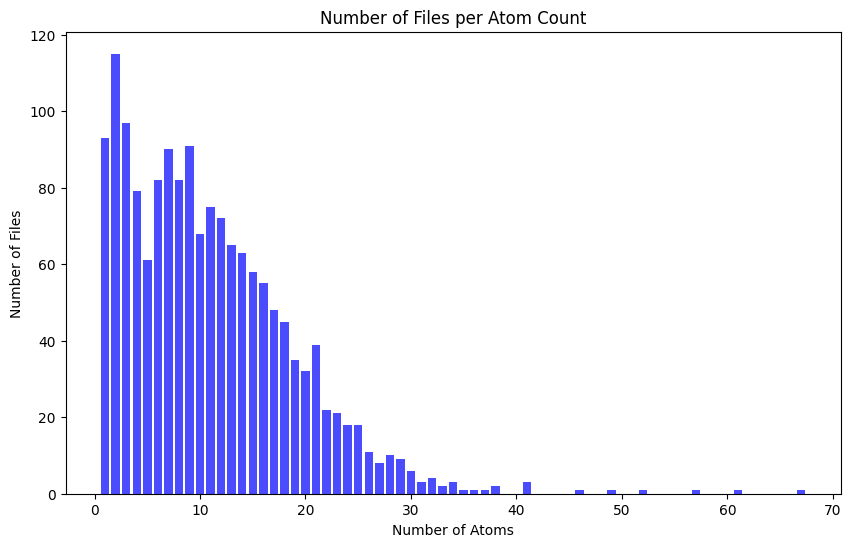

In [8]:
labels = list(counter.keys())
values = list(counter.values())

plt.figure(figsize=(10,6))
plt.bar(labels, values, color='blue', alpha=0.7)
plt.xlabel('Number of Atoms')
plt.ylabel('Number of Files')
plt.title('Number of Files per Atom Count')
plt.show()

### Explore Traj File

To explore the Traj files, we will use the `ase.io.Trajectory` https://wiki.fysik.dtu.dk/ase/ase/io/trajectory.html#module-ase.io.trajectory

In [9]:
traj_0 = Trajectory(full_paths_list[0])

**number of atoms**

In [10]:
len(traj_0)

13

In [11]:
traj_0

In [12]:
for atom in traj_0:
    print(atom.get_positions().shape)

(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)


In [13]:
atom_00 = traj_0[0]

**atom information**

In [14]:
atom_00.cell

Cell([5.427360021299954, 6.2669800272488105, 5.700030025320797])

In [15]:
atom_00.cell[:]

array([[5.42736002, 0.        , 0.        ],
       [0.        , 6.26698003, 0.        ],
       [0.        , 0.        , 5.70003003]])

In [16]:
atom_00.get_positions().shape

(96, 3)

pbc indicates whether periodic boundary conditions are to be used in the directions of the three vectors of the unit cell. A slab calculation with periodic boundary conditions in x and y directions and free boundary conditions in the z direction is obtained through

In [17]:
atom_00.numbers.shape

(96,)

In [18]:
atom_00.calc.parameters

{}

In [19]:
atom_00.get_potential_energy()

-1405.5949396154908

### Another Traj file

In [20]:
traj_1 = Trajectory(full_paths_list[1])

In [21]:
len(traj_1)

23

In [22]:
for atom in traj_1:
    print(atom.get_positions().shape)

(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)
(96, 3)


In [23]:
atom_10 = traj_1[0]

In [24]:
atom_10

Atoms(symbols='H96', pbc=True, cell=[5.3713500214271095, 6.202300024994937, 5.641200024215734], calculator=SinglePointCalculator(...))

In [25]:
atom_10.cell

Cell([5.3713500214271095, 6.202300024994937, 5.641200024215734])

In [26]:
atom_10.pbc

array([ True,  True,  True])

In [27]:
atom_10.calc

In [28]:
atom_10.get_potential_energy()

-1424.416243551219

## HDF5 Creation

In [29]:
with h5py.File("hydrogen.h5", "w") as f:
    for fn in full_paths_list:
        traj = Trajectory(fn)
        
        folder_name = fn.split("/")[1]
        file_name = fn.split("/")[-1]
        number_atom = len(traj)
        
        # Check if group exists, else create
        if folder_name not in f:
            group = f.create_group(folder_name)
        all_atom_positions = []
        for atom_id in range(number_atom):
            position = traj[atom_id].get_positions()
            all_atom_positions.append(position)
        traj_position_array = np.array(all_atom_positions)
        
        dataset_name = "{}".format(file_name)
        group.create_dataset(dataset_name, data=traj_position_array, shape=traj_position_array.shape)

In [30]:
!h5ls -r hydrogen.h5

/                        Group
/f54-hs1                 Group
/f54-hs1/pbe-n096-ts0005-p050-t1000.pbe.traj.dmc.traj Dataset {6, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t1200.pbe.traj.dmc.traj Dataset {1, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t1400.pbe.traj.dmc.traj Dataset {3, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t1600.pbe.traj.dmc.traj Dataset {1, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t1800.pbe.traj.dmc.traj Dataset {8, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t2000.pbe.traj.dmc.traj Dataset {5, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t2200.pbe.traj.dmc.traj Dataset {8, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t600.pbe.traj.dmc.traj Dataset {4, 96, 3}
/f54-hs1/pbe-n096-ts0005-p050-t800.pbe.traj.dmc.traj Dataset {3, 96, 3}
/f54-hs1/pbe-n096-ts0005-p075-t1000.pbe.traj.dmc.traj Dataset {2, 96, 3}
/f54-hs1/pbe-n096-ts0005-p075-t1200.pbe.traj.dmc.traj Dataset {6, 96, 3}
/f54-hs1/pbe-n096-ts0005-p075-t1400.pbe.traj.dmc.traj Dataset {14, 96, 3}
/f54-hs1/pbe-n096-ts0005-p075-t1600.pbe.traj.dmc.traj Dataset {